In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [2]:
# Cargar los datos
remates = pd.read_csv('remates.csv')


In [3]:

X_benchmark = remates[["distance"]]
y_benchmark = remates[["goal"]]

X_train_benchmark, X_test_benchmark, y_train_benchmark, y_test_benchmark = train_test_split(X_benchmark, y_benchmark, stratify=y_benchmark, test_size=0.2, random_state=42)

model_benchmark = LogisticRegression()
model_benchmark.fit(X_train_benchmark, y_train_benchmark)

c:\Users\Lucas Roman Gervasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [4]:
#Predicciones de probabilidad
y_proba_log_benchmark = model_benchmark.predict_proba(X_test_benchmark)[:, 1]

#Clasificación con umbral personalizado
threshold_benchmark = 0.17
y_pred_custom_benchmark = (y_proba_log_benchmark > threshold_benchmark).astype(int)

In [5]:
# 6. Métricas
print("F1 Score con threshold 0.17 (benchmark):", f1_score(y_test_benchmark, y_pred_custom_benchmark))
print("ROC AUC (benchmark):", roc_auc_score(y_test_benchmark, y_proba_log_benchmark))

F1 Score con threshold 0.17 (benchmark): 0.33503735745182855
ROC AUC (benchmark): 0.7568584901940029


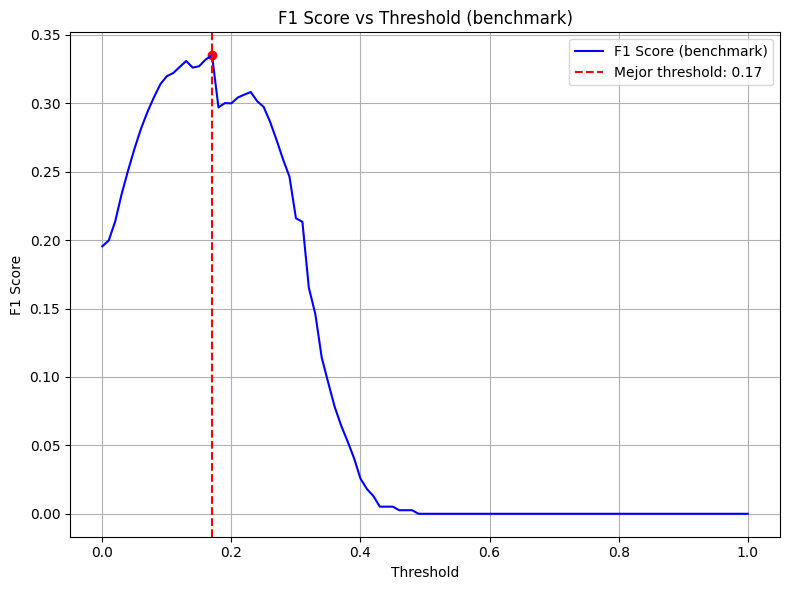

In [6]:
# Elección de thresholds (benchmark)
thresholds_benchmark = np.arange(0.0, 1.01, 0.01)
f1_scores_benchmark = []

for t in thresholds_benchmark:
    y_pred_benchmark = (y_proba_log_benchmark > t).astype(int)
    f1_benchmark = f1_score(y_test_benchmark, y_pred_benchmark)
    f1_scores_benchmark.append(f1_benchmark)

# Mejor threshold
best_idx_benchmark = np.argmax(f1_scores_benchmark)
best_threshold_benchmark = thresholds_benchmark[best_idx_benchmark]
best_f1_benchmark = f1_scores_benchmark[best_idx_benchmark]

plt.figure(figsize=(8, 6))
plt.plot(thresholds_benchmark, f1_scores_benchmark, label='F1 Score (benchmark)', color='blue')
plt.axvline(best_threshold_benchmark, color='red', linestyle='--', label=f'Mejor threshold: {best_threshold_benchmark:.2f}')
plt.scatter(best_threshold_benchmark, best_f1_benchmark, color='red')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (benchmark)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\Lucas Roman Gervasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lucas Roman Gervasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lucas Roman Gervasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

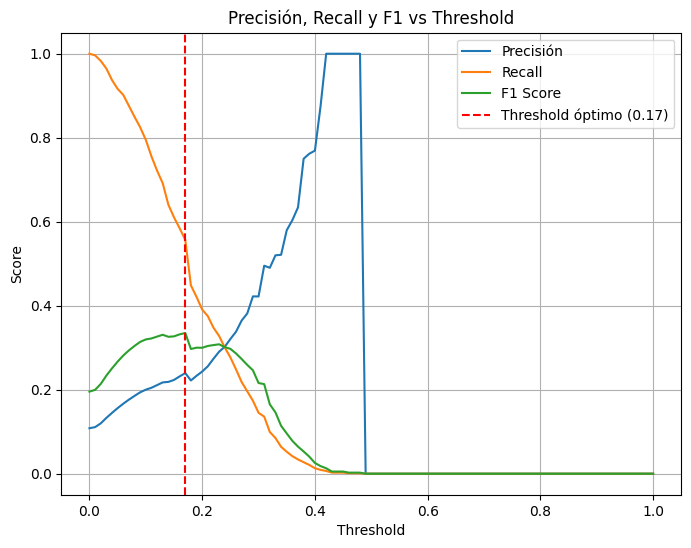

In [30]:
from sklearn.metrics import precision_score, recall_score

precisions, recalls = [], []
for t in thresholds_benchmark:
    y_pred = (y_proba_log_benchmark > t).astype(int)
    precisions.append(precision_score(y_test_benchmark, y_pred))
    recalls.append(recall_score(y_test_benchmark, y_pred))

plt.figure(figsize=(8,6))
plt.plot(thresholds_benchmark, precisions, label='Precisión')
plt.plot(thresholds_benchmark, recalls, label='Recall')
plt.plot(thresholds_benchmark, f1_scores_benchmark, label='F1 Score')
plt.axvline(best_threshold_benchmark, color='red', linestyle='--', label=f'Threshold óptimo ({best_threshold_benchmark:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precisión, Recall y F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


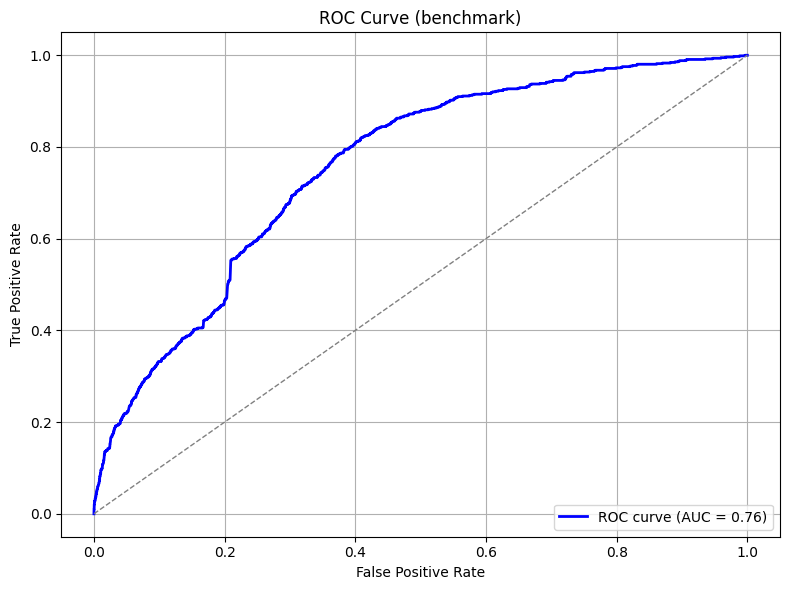

In [7]:
# Calcular FPR, TPR y thresholds (benchmark)
fpr_benchmark, tpr_benchmark, thresholds_benchmark_roc = roc_curve(y_test_benchmark, y_proba_log_benchmark)
roc_auc_benchmark = auc(fpr_benchmark, tpr_benchmark)

plt.figure(figsize=(8, 6))
plt.plot(fpr_benchmark, tpr_benchmark, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_benchmark:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (benchmark)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

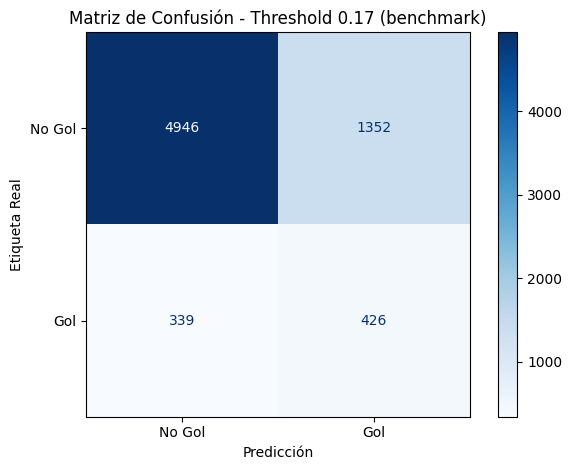

Verdaderos Negativos (TN): 4946
Falsos Positivos (FP): 1352
Falsos Negativos (FN): 339
Verdaderos Positivos (TP): 426


In [8]:
# Matriz de confusión con threshold personalizado (benchmark)
cm_benchmark = confusion_matrix(y_test_benchmark, y_pred_custom_benchmark)
disp_benchmark = ConfusionMatrixDisplay(confusion_matrix=cm_benchmark, display_labels=["No Gol", "Gol"])

# Graficar matriz con colormap azul
disp_benchmark.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - Threshold 0.17 (benchmark)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

tn_b, fp_b, fn_b, tp_b = cm_benchmark.ravel()
print(f"Verdaderos Negativos (TN): {tn_b}")
print(f"Falsos Positivos (FP): {fp_b}")
print(f"Falsos Negativos (FN): {fn_b}")
print(f"Verdaderos Positivos (TP): {tp_b}")

In [9]:

# Selección de variables
X = remates[['distance', 'habil_shot']]
y = remates['goal']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesador: escala 'distance' y codifica 'habil_shot'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['distance']),
        ('cat', OneHotEncoder(drop='if_binary'), ['habil_shot']),
    ]
)

# Pipeline: preprocesamiento + regresión logística
modelo_log = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenamiento del modelo
modelo_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['distance']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['habil_shot'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [10]:
#Predicciones de probabilidad
y_proba_log = modelo_log.predict_proba(X_test)[:, 1]

#Clasificación con umbral personalizado
threshold = 0.17
y_pred_custom = (y_proba_log > threshold).astype(int)

In [11]:
# 6. Métricas
print("F1 Score con threshold 0.17:", f1_score(y_test, y_pred_custom))
print("ROC AUC:", roc_auc_score(y_test, y_proba_log))

F1 Score con threshold 0.17: 0.38854073410922113
ROC AUC: 0.7928074894144992


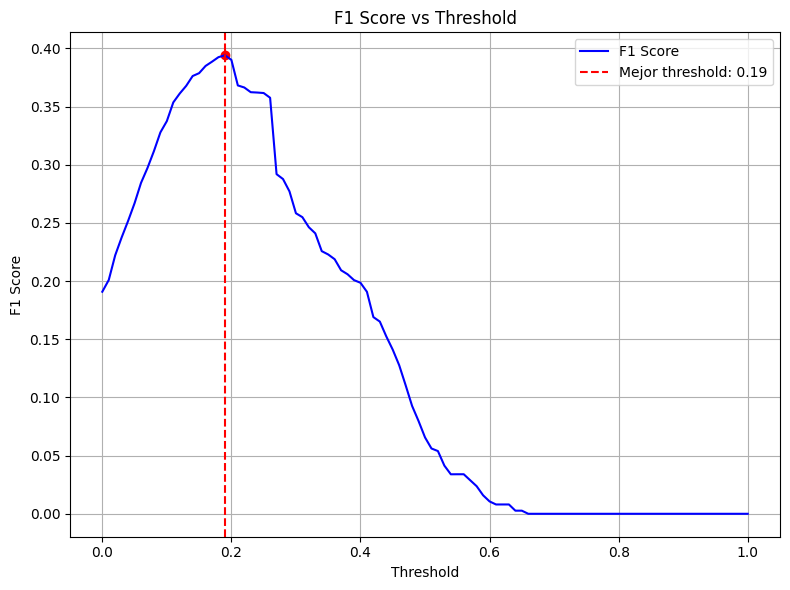

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Lista de thresholds a evaluar
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

# Calcular F1 score para cada threshold
for t in thresholds:
    y_pred = (y_proba_log > t).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Encontrar el mejor threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Mejor threshold: {best_threshold:.2f}')
plt.scatter(best_threshold, best_f1, color='red')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


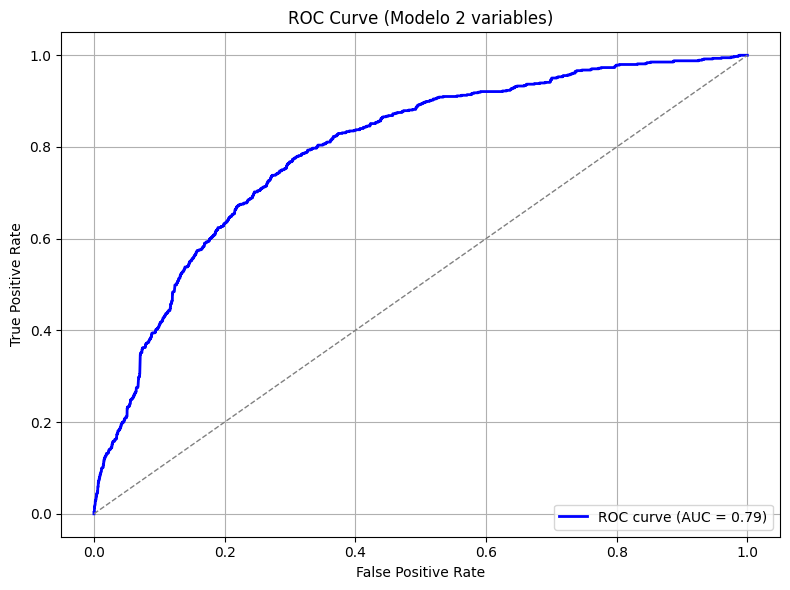

In [32]:
# Calcular FPR, TPR y thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Modelo 2 variables)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

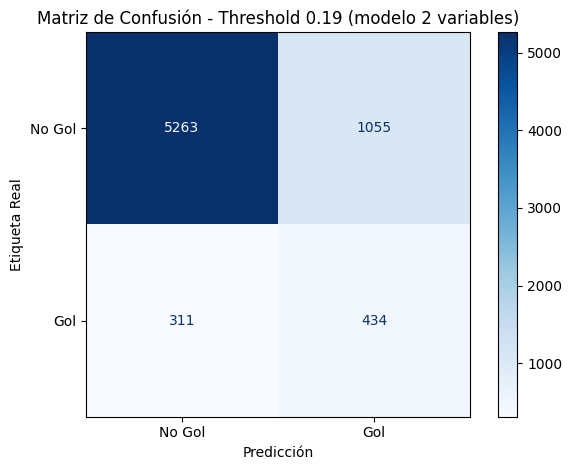

Verdaderos Negativos (TN): 5263
Falsos Positivos (FP): 1055
Falsos Negativos (FN): 311
Verdaderos Positivos (TP): 434


In [34]:
# Matriz de confusión con threshold personalizado
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Gol", "Gol"])

# Graficar matriz con colormap azul
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - Threshold 0.19 (modelo 2 variables)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred_custom)
tn, fp, fn, tp = cm.ravel()
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

In [15]:
#Ambos modelos tienen desempeño muy parecido en F1 Score y
#precisión, pero el modelo con distancia + ángulo captura 
#un poco más goles reales (mejor recall)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Variables predictoras y objetivo
X2 = remates[[
    'distance', 
    'angle', 
    'body_part_category', 
    'habil_shot', 
    'min_dist_blocking',
    'shot_technique'
]]
y2 = remates['goal']
print(remates.columns)
print(remates[['min_dist_blocking']].head())
# División train-test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# Variables categóricas
columnas_categoricas2 = ['body_part_category', 'habil_shot',  'shot_technique']
columnas_numericas2 = ['distance', 'angle', 'min_dist_blocking']


preprocessor2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas2),
        ('num', StandardScaler(), columnas_numericas2)
    ]
)

# Pipeline
modelo_log_2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Entrenar
modelo_log_2.fit(X_train2, y_train2)

# Predecir
y_pred2 = modelo_log_2.predict(X_test2)
y_proba_log2 = modelo_log_2.predict_proba(X_test2)[:, 1]


Index(['duration', 'id', 'index', 'location', 'match_id', 'minute', 'period',
       'play_pattern', 'player', 'player_id', 'position', 'possession',
       'possession_team', 'possession_team_id', 'related_events', 'second',
       'shot_aerial_won', 'shot_body_part', 'shot_end_location',
       'shot_first_time', 'shot_freeze_frame', 'shot_key_pass_id',
       'shot_outcome', 'shot_technique', 'shot_type', 'team', 'team_id',
       'timestamp', 'type', 'under_pressure', 'shot_deflected',
       'shot_one_on_one', 'shot_redirect', 'shot_open_goal',
       'shot_saved_off_target', 'shot_saved_to_post', 'shot_follows_dribble',
       'x', 'y', 'players_foot', 'goal', 'distance', 'angle', 'angle_degrees',
       'shot_area', 'players_in_box', 'any_player_in_box', 'goalkeeper_ingoal',
       'goalkeeper_data', 'goalkeeper_positions', 'players_in_box_data',
       'players_positions_in_box', 'habil_shot', 'body_part_category',
       'players_blocking', 'players_positions_blocking', 'any_p

                              feature  coefficient  abs_coefficient  \
13                      num__distance    -1.738831         1.738831   
9             cat__shot_technique_Lob     1.575307         1.575307   
11  cat__shot_technique_Overhead Kick    -1.196514         1.196514   
7   cat__shot_technique_Diving Header     1.058672         1.058672   
6        cat__shot_technique_Backheel    -1.027636         1.027636   
1        cat__body_part_category_head    -0.871465         0.871465   
12         cat__shot_technique_Volley    -0.675716         0.675716   
5             cat__habil_shot_unknown    -0.675391         0.675391   
8     cat__shot_technique_Half Volley    -0.495719         0.495719   
4                cat__habil_shot_True     0.254202         0.254202   

              feature_esp  
13  Distancia del disparo  
9                 Globito  
11                Chilena  
7                Palomita  
6                    Taco  
1                  Cabeza  
12                  Vo

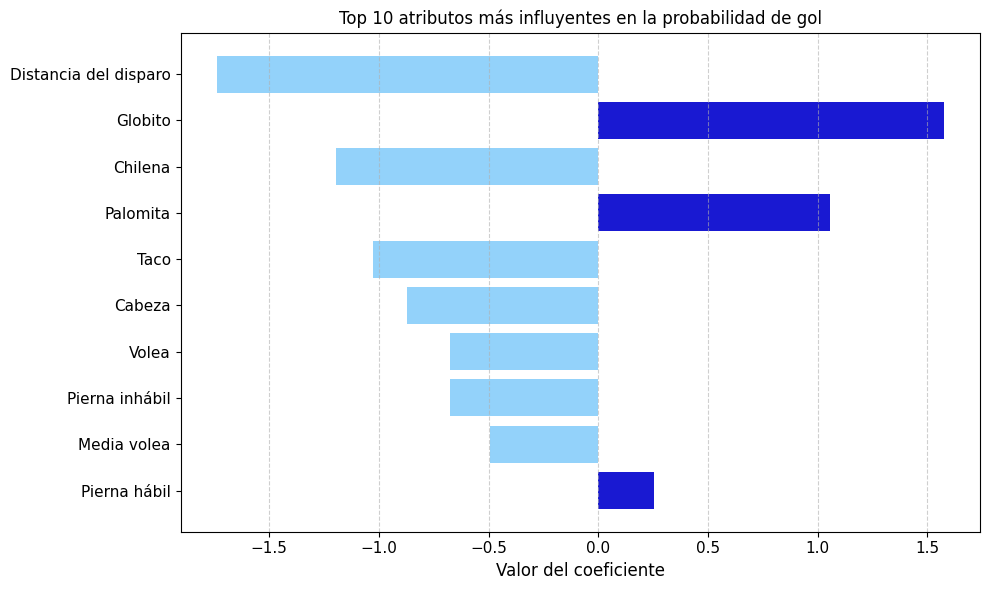

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize, LinearSegmentedColormap

colores = [ '#87CEFA','#0000CD']
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores)
# Obtener nombres de features procesadas y coeficientes
feature_names = modelo_log_2.named_steps["preprocessor"].get_feature_names_out()
coefs = modelo_log_2.named_steps["classifier"].coef_[0]

# DataFrame de coeficientes
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "abs_coefficient": np.abs(coefs)
})
# Top 10 coeficientes absolutos
top_coef = coef_df.sort_values("abs_coefficient", ascending=False).head(10)
traducciones = {
    'cat__play_pattern_Penalty': 'Penal',
    'num__distance': 'Distancia del disparo',
    'cat__shot_technique_Lob': 'Globito',
    'cat__shot_technique_Overhead Kick': 'Chilena',
    'cat__shot_technique_Diving Header': 'Palomita',
    'cat__shot_technique_Backheel': 'Taco',
    'cat__habil_shot_unknown': 'Pierna inhábil',
    'cat__play_pattern_From Corner': 'Desde el córner',
    'cat__shot_aerial_won_True': 'Remate duelo aéreo',
    'cat__shot_technique_Volley': 'Volea',
    'cat__body_part_category_head': 'Cabeza',
    'cat__play_pattern_From Kick Off': 'Desde el saque inicial',
    'cat__play_pattern_From Throw In': 'Desde saque de banda',
    'cat__play_pattern_Regular Play': 'Juego regular',
    'cat__shot_body_part_Other': 'Otra parte del cuerpo',
    'cat__play_pattern_From Goal Kick': 'Desde saque del portero',
    'cat__shot_technique_Half Volley': 'Media volea',  
    'cat__habil_shot_True' : 'Pierna hábil'
}

# Aplicar traducción
top_coef["feature_esp"] = top_coef["feature"].replace(traducciones)
print(top_coef)

# Colores según signo
# Colores según el signo del coeficiente
colores = ['#0000CD' if c > 0 else '#87CEFA' for c in top_coef["coefficient"]]  # azul para positivos, rojo para negativos

plt.figure(figsize=(10, 6))
plt.barh(
    top_coef["feature_esp"][::-1],
    top_coef["coefficient"][::-1],
    color=colores[::-1],
    alpha=0.9
)
plt.xlabel("Valor del coeficiente", fontsize=12)
plt.title("Top 10 atributos más influyentes en la probabilidad de gol")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


In [45]:
# play_pattern_Other: Situación de juego abierta o normal. Aumenta la probabilidad de gol.

# distance: Distancia al arco. A mayor distancia, menor probabilidad de gol.

# shot_aerial_won_True: Disparo tras ganar un balón aéreo. Disminuye la probabilidad de gol.

# shot_technique_Lob: Disparo tipo “vaselina” o globito. Aumenta la probabilidad de gol.

# goalkeeper_ingoal_True: Portero en línea de tiro. Disminuye la probabilidad de gol.

# habil_shot_False: Disparo con pie no hábil. Disminuye la probabilidad de gol.

# play_pattern_From Corner: Tiro desde un córner. Disminuye la probabilidad de gol.

# shot_technique_Backheel: Disparo con talón. Disminuye la probabilidad de gol.

# shot_technique_Overhead Kick: Disparo de chilena. Disminuye la probabilidad de gol.

# play_pattern_From Kick Off: Tiro tras saque inicial o reinicio. Disminuye la probabilidad de gol.

Mejor threshold: 0.69 con F1 score: 0.4195


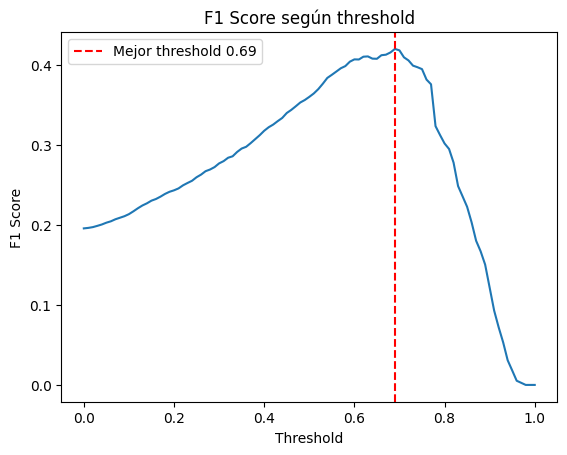

In [46]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Rango de thresholds (de 0 a 1 con paso 0.01)
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred = (y_proba_log2 > t).astype(int)
    f1_scores.append(f1_score(y_test2, y_pred))

# Mejor threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Mejor threshold: {best_threshold:.2f} con F1 score: {best_f1:.4f}")

plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score según threshold')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Mejor threshold {best_threshold:.2f}')
plt.legend()
plt.show()


In [50]:
y_proba_log2 = modelo_log_2.predict_proba(X_test2)[:, 1]
thresholds2 = 0.69
y_pred_custom2 = (y_proba_log2 > thresholds2).astype(int)

# Métricas
print("F1 Score con threshold 0.68:", f1_score(y_test2, y_pred_custom2))
print("ROC AUC:", roc_auc_score(y_test2, y_proba_log2))

F1 Score con threshold 0.68: 0.41954022988505746
ROC AUC: 0.803453217849011


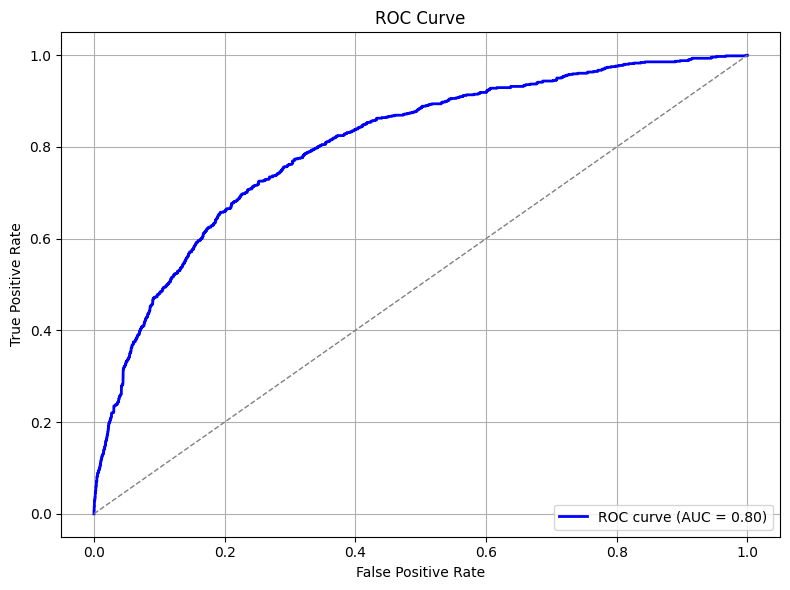

In [51]:
# Calcular FPR, TPR y thresholds
fpr, tpr, thresholds2 = roc_curve(y_test2, y_proba_log2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

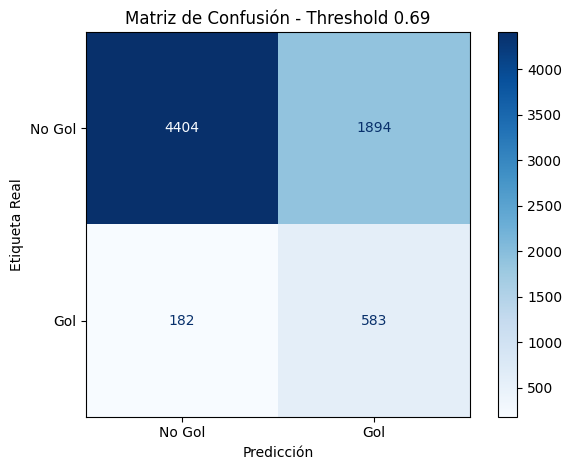

Verdaderos Negativos (TN): 4404
Falsos Positivos (FP): 1894
Falsos Negativos (FN): 182
Verdaderos Positivos (TP): 583


In [53]:
# Matriz de confusión con threshold personalizado
cm = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Gol", "Gol"])

# Graficar matriz con colormap azul
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - Threshold 0.69")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test2, y_pred2)
tn, fp, fn, tp = cm.ravel()
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

In [23]:
import pandas as pd

# Supongamos que ya tenés:
# remates: DataFrame con todos los remates, y una columna 'goal' con 0/1 reales
# modelo_log_2: modelo entrenado con método predict_proba
# X_test2: conjunto de test con las features para predecir
# y_test: etiquetas reales para el set de test (opcional, si la tenés)
# X_total: todo el dataset (features) para predecir (debe coincidir con remates)

# --- Probabilidades y comparación para el set de test ---
probabilidades_test = modelo_log_2.predict_proba(X_test2)[:, 1]
probabilidades_test_df = pd.DataFrame(probabilidades_test, columns=['probabilidad_gol'])
X_probabilidades_test = pd.concat([X_test2.reset_index(drop=True), probabilidades_test_df], axis=1)

print("Sumatoria de goles reales en test:", probabilidades_test_df.sum())
print("Suma de probabilidades predichas en test:", X_probabilidades_test.probabilidad_gol.sum())




Sumatoria de goles reales en test: probabilidad_gol    2807.318173
dtype: float64
Suma de probabilidades predichas en test: 2807.3181731111777


In [24]:
from sklearn.model_selection import cross_val_score

f1_cv_2 = cross_val_score(modelo_log_2, X2, y2, cv=5, scoring='f1')
roc_auc_cv_2 = cross_val_score(modelo_log_2, X2, y2, cv=5, scoring='roc_auc')

print("F1 Score CV promedio (modelo_log_2):", f1_cv_2.mean())
print("ROC AUC CV promedio (modelo_log_2):", roc_auc_cv_2.mean())

F1 Score CV promedio (modelo_log_2): 0.3582758280223091
ROC AUC CV promedio (modelo_log_2): 0.7977248164393542


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
# Extraer el preprocesador y el modelo
preprocessor = modelo_log_2.named_steps['preprocessor']
log_reg = modelo_log_2.named_steps['classifier']

# Obtener los nombres de las columnas transformadas
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(columnas_categoricas2)
num_features = ['distance', 'angle']
features_names = np.concatenate([cat_features, num_features])

# Obtener coeficientes del modelo
coef = log_reg.coef_[0]

# Crear dataframe con coeficientes y nombres
# coef_df = pd.DataFrame({'feature': features_names, 'coeficiente': coef})

# Ordenar por valor absoluto descendente
# coef_df = coef_df.reindex(coef_df.coeficiente.abs().sort_values(ascending=False).index)

print(coef_df)

                              feature  coefficient  abs_coefficient
0        cat__body_part_category_foot     0.129507         0.129507
1        cat__body_part_category_head    -0.871465         0.871465
2       cat__body_part_category_other     0.196074         0.196074
3               cat__habil_shot_False    -0.124695         0.124695
4                cat__habil_shot_True     0.254202         0.254202
5             cat__habil_shot_unknown    -0.675391         0.675391
6        cat__shot_technique_Backheel    -1.027636         1.027636
7   cat__shot_technique_Diving Header     1.058672         1.058672
8     cat__shot_technique_Half Volley    -0.495719         0.495719
9             cat__shot_technique_Lob     1.575307         1.575307
10         cat__shot_technique_Normal     0.215722         0.215722
11  cat__shot_technique_Overhead Kick    -1.196514         1.196514
12         cat__shot_technique_Volley    -0.675716         0.675716
13                      num__distance    -1.7388

In [26]:
# Asegurate de usar las mismas columnas que usaste para entrenar
X_all = remates[[    'distance', 
    'angle', 
    'body_part_category', 
    'habil_shot', 
    'min_dist_blocking',
    'shot_technique']]

# Predecir probabilidades para todo el dataset
y_proba_all = modelo_log_2.predict_proba(X_all)[:, 1]

# Crear la columna xG inicial con predicciones del modelo
remates['xG'] = y_proba_all


# Guardar
remates.to_csv('rematesxG.csv', index=False)


In [27]:
# Agregar la columna 'goal' a las columnas de interés
columnas_interes = ['distance', 

    'habil_shot', 
    'play_pattern', 'xG', 'goal']

# 10 filas con gol (goal == 1)
goles = remates[remates['goal'] == 1][columnas_interes].head(7)

# 10 filas sin gol (goal == 0)
no_goles = remates[remates['goal'] == 0][columnas_interes].head(5)

# Combinar y resetear índice
muestra = pd.concat([goles, no_goles]).reset_index(drop=True)

print(muestra)

     distance habil_shot    play_pattern        xG  goal
0   11.800424       True         Penalty  0.778108     1
1   16.240998      False     From Corner  0.554340     1
2   15.524175       True  From Free Kick  0.645189     1
3   17.204651      False    Regular Play  0.198600     1
4   30.594117       True  From Free Kick  0.137106     1
5    7.615773       True   From Throw In  0.786862     1
6    7.000000       True  From Free Kick  0.909745     1
7   28.270479       True    Regular Play  0.151102     0
8   35.503943       True   From Throw In  0.057954     0
9   25.824020       True     From Keeper  0.206309     0
10  20.718349       True   From Throw In  0.298452     0
11  29.167105       True    Regular Play  0.150141     0


In [28]:
from sklearn.calibration import CalibratedClassifierCV

modelo_log_calibrado = CalibratedClassifierCV(modelo_log_2, method='isotonic', cv=5)
modelo_log_calibrado.fit(X_train2, y_train2)
y_proba_calibrada = modelo_log_calibrado.predict_proba(X_test2)[:, 1]

In [29]:
# Agregar la columna 'goal' a las columnas de interés
columnas_interes = ['distance', 
    'play_pattern', 'xG', 'goal']

# Filtrar solo penales con distancia <= 12 (aprox. distancia estándar de un penal)
penales = remates[(remates['shot_type'] == 'Penalty')][columnas_interes].head(3)

# Filtrar remates normales con distancia <= 25
normal = remates[(remates['shot_type'] != 'Penalty') & (remates['distance'] <= 10)][columnas_interes].head(7)

# Combinar y resetear índice
muestra_penales = pd.concat([penales, normal]).reset_index(drop=True)

print(muestra_penales)

    distance    play_pattern        xG  goal
0  11.800424         Penalty  0.778108     1
1  12.000000         Penalty  0.771861     0
2  11.045361         Penalty  0.799353     1
3   7.093659    Regular Play  0.567639     0
4   8.052329     From Corner  0.752594     0
5   9.433981  From Free Kick  0.683420     0
6   7.615773   From Throw In  0.786862     1
7   9.219544  From Free Kick  0.751121     0
8   7.000000  From Free Kick  0.909745     1
9   4.545327     From Corner  0.679659     0
